# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'cities.csv'
# for local use
# output_data_file = r'C:\Users\klsom\Desktop\Homework_KLS\Python APIs\cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q='

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | maceio
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | katsuura
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kloulklubed
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | barrow
City not found. Skipping...
Processing Record 14 of Set 1 | mahenge
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | lee
Processing Record 17 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | chimbote
Processing Record 20 of Set 1 | madang
City not found. Skipping...
Processing Record 21 of Set 1 | methoni
City not f

Processing Record 37 of Set 4 | umea
City not found. Skipping...
Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | saint-augustin
Processing Record 40 of Set 4 | lerwick
Processing Record 41 of Set 4 | necochea
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | valparaiso
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | obama
Processing Record 46 of Set 4 | tezpur
Processing Record 47 of Set 4 | carauari
Processing Record 48 of Set 4 | adrar
Processing Record 49 of Set 4 | sechura
City not found. Skipping...
Processing Record 1 of Set 5 | colchester
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | cockburn town
City not found. Skipping...
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | gat
Processing Record 7 of Set 5 | bayan
Processing Record 8 of Set 5 | rio gallegos
Processing R

City not found. Skipping...
Processing Record 22 of Set 8 | isangel
City not found. Skipping...
Processing Record 23 of Set 8 | assiniboia
Processing Record 24 of Set 8 | peterhead
Processing Record 25 of Set 8 | saint-ambroise
Processing Record 26 of Set 8 | erenhot
Processing Record 27 of Set 8 | batagay-alyta
Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | warmbad
Processing Record 31 of Set 8 | ahipara
Processing Record 32 of Set 8 | valleyview
Processing Record 33 of Set 8 | lagoa formosa
Processing Record 34 of Set 8 | guthrie
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | nianzishan
Processing Record 37 of Set 8 | zharkent
Processing Record 38 of Set 8 | camacha
Processing Record 39 of Set 8 | whitehorse
Processing Record 40 of Set 8 | windhoek
Processing Record 41 of Set 8 | manyana
Processing Record 42 of Set 8 | pokhara
City not found. Skipping...
Processing Record 43 of Set 8 | rum

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,georgetown,40,GY,1570557500,62,6.80,-58.16,89.60,13.87
1,jamestown,0,AU,1570557500,86,-33.21,138.60,37.49,9.91
2,ponta do sol,95,BR,1570557501,50,-0.53,-65.05,90.77,1.63
3,maceio,75,BR,1570557501,62,-9.67,-35.74,84.20,14.99
4,kapaa,1,US,1570557318,88,22.08,-159.32,73.99,5.82


In [6]:
# output data to csv
weather_df.to_csv(output_data_file)
weather_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

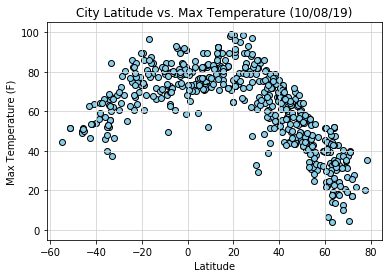

In [7]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Max Temperature (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(-5, 105)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')
plt.savefig('Latitude vs. Temperature.png')
# for local use
# plt.savefig(r'C:\Users\klsom\Desktop\Homework_KLS\Python APIs\Latitude vs. Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

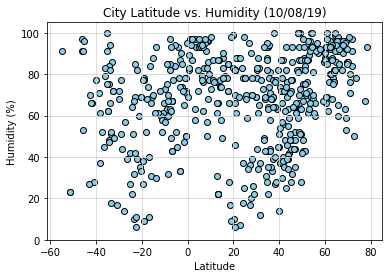

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Humidity (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')
plt.savefig('Latitude vs. Humidity.png')
# for local use
# plt.savefig(r'C:\Users\klsom\Desktop\Homework_KLS\Python APIs\Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

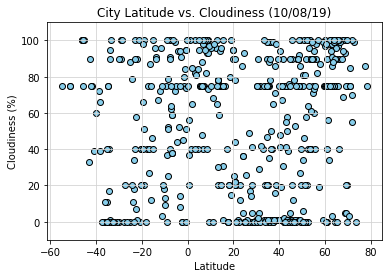

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Cloudiness (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-10, 110)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')
plt.savefig('Latitude vs. Cloudiness.png')
# for local use
# plt.savefig(r'C:\Users\klsom\Desktop\Homework_KLS\Python APIs\Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

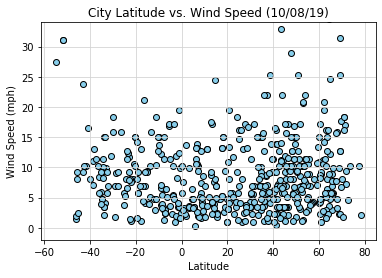

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Wind Speed (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 34)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')
plt.savefig('Latitude vs. Wind Speed.png')
# for local use
# plt.savefig(r'C:\Users\klsom\Desktop\Homework_KLS\Python APIs\Latitude vs. Wind Speed.png')
plt.show()

In [ ]:
# Three observable trends:
# 1: The first trend I observed is that in cities with higher latitude the temperature 
# is generally lower. I feel like this makes sense as we are taught that the closer to 
# the equator you go the warmer temperatures tend to be.

# 2: While the data here does not explicitly reflect that having a latitude and longitude
# pair near a body of water is much more likely to be a humid or cloudy climate; I believe
# if I were to plot on a heat map or something similar we would find the climates with the
# highest level of humidity and cloudiness would be within a close proximity to water.

# 3: Lastly, the wind speed does not have any major correlation to high or latitude but 
# appears to be consistent across cities. Most cities fall within the 0 – 15 mph range. 